In [134]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)

In [135]:
N, M = 400, 400

N_SECTIONS = 25
SEC_SIZE = N // N_SECTIONS

PROBABILITY = 0.995

In [136]:
mat = np.random.rand(N, M) >= PROBABILITY

In [137]:
indices = [np.nonzero(row)[0] for row in mat]
indices = [x if len(x) > 0 else [M] for x in indices]
sorted_mat = mat[np.argsort([min(x) for x in indices])]

In [138]:
sec_indices = np.zeros((N // SEC_SIZE, M // SEC_SIZE))
for i in range(N // SEC_SIZE):
    for j in range(M // SEC_SIZE):
        if np.any(mat[i * SEC_SIZE:(i + 1) * SEC_SIZE, j * SEC_SIZE:(j + 1) * SEC_SIZE]):
            sec_indices[i, j] = 1

sorted_sec_indices = np.zeros((N // SEC_SIZE, M // SEC_SIZE))
for i in range(N // SEC_SIZE):
    for j in range(M // SEC_SIZE):
        if np.any(sorted_mat[i * SEC_SIZE:(i + 1) * SEC_SIZE, j * SEC_SIZE:(j + 1) * SEC_SIZE]):
            sorted_sec_indices[i, j] = 1

In [139]:
def print_mat(mat):
    for i in range(N):
        if i % SEC_SIZE == 0:
            print("-" * ((M + N_SECTIONS) * 2 + 1))
        for j in range(M):
            if j % SEC_SIZE == 0:
                print("|", end=" ")
            print(f"{mat[i][j]}", end=" ") if mat[i][j] != 0 else print(" ", end=" ")
        print("|")
    print("-" * ((M + N_SECTIONS) * 2 + 1))
    print()

def show_mat(old_mat, new_mat):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(old_mat, cmap="binary")
    ax[0].set_title("Before shuffling")
    ax[1].imshow(new_mat, cmap="binary")
    ax[1].set_title("After shuffling")
    plt.show()

In [140]:
print("Non-zeros: ", np.sum(mat))
print(f"Non-zeros ratio: {np.sum(mat) / (N * M) * 100:.2f}%")

Non-zeros:  824
Non-zeros ratio: 0.52%


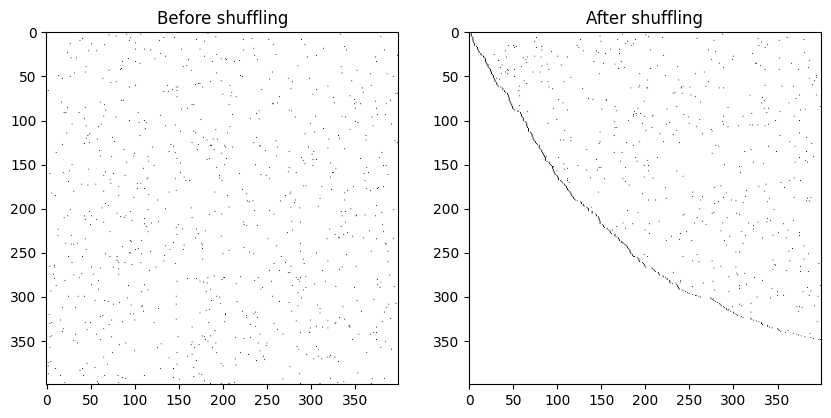

In [141]:
show_mat(mat, sorted_mat)

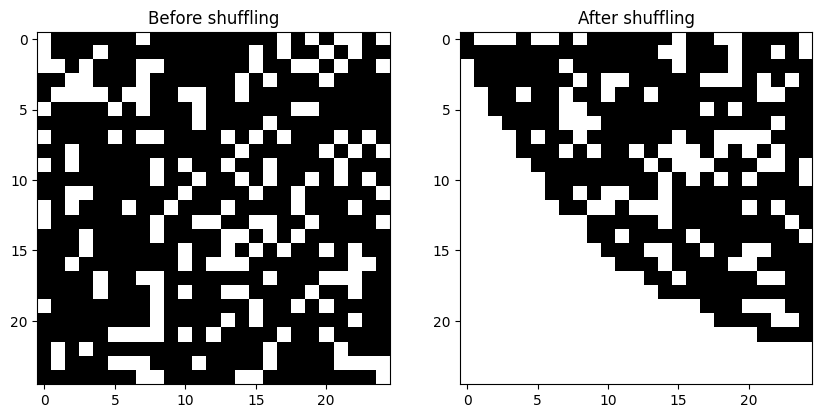

In [142]:
show_mat(sec_indices, sorted_sec_indices)